In [43]:
#Fuente:
#https://www.google.com/search?client=firefox-b-d&q=clasificacion+liga+santander#sie=lg;/g/11j0y2m458;2;/m/09gqx;st;fp;1;;
#https://stats.stackexchange.com

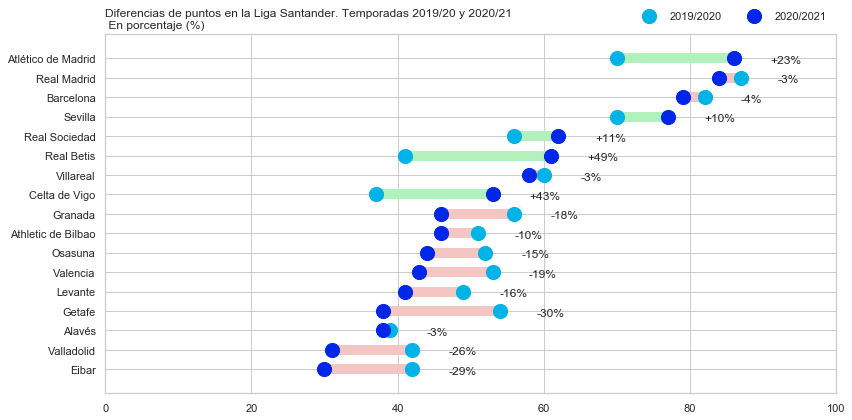

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
sns.set(style="whitegrid")  # set style

data = io.StringIO("""
                        "Equipo"  2019/2020  2020/2021
                        "Atlético de Madrid" 70 86
                        "Real Madrid" 87 84
                        "Barcelona" 82 79
                        "Sevilla" 70 77
                        "Real Sociedad" 56 62
                        "Real Betis" 41 61
                        "Villareal" 60 58
                        "Celta de Vigo" 37 53
                        "Granada" 56 46
                        "Athletic de Bilbao" 51 46
                        "Osasuna" 52 44
                        "Valencia" 53 43
                        "Levante" 49 41
                        "Getafe" 54 38
                        "Alavés" 39 38
                        "Valladolid" 42 31
                        "Eibar" 42 30
""")

df = pd.read_csv(data, sep="\s+", quotechar='"')
df = df.set_index("Equipo").sort_values("2020/2021")
df["change"] = df["2020/2021"] / df["2019/2020"] - 1

plt.figure(figsize=(12,6))

y_range = np.arange(1, len(df.index) + 1)

colors = np.where(df['2020/2021'] > df['2019/2020'], '#b2f1bc', '#f3c5c3')

plt.hlines(y=y_range, xmin=df['2019/2020'], xmax=df['2020/2021'], color=colors, lw=10)

plt.scatter(df['2019/2020'], y_range, color='#00b3e7', s=200, label='2019/2020', zorder=3)
plt.scatter(df['2020/2021'], y_range, color='#0027e7', s=200 , label='2020/2021', zorder=3)

for (_, row), y in zip(df.iterrows(), y_range):
    plt.annotate(f"{row['change']:+.0%}", (max(row["2019/2020"], row["2020/2021"]) + 5, y - 0.25))
plt.legend(ncol=2, bbox_to_anchor=(1., 1.01), loc="lower right", frameon=False)

plt.yticks(y_range, df.index)
plt.title("Diferencias de puntos en la Liga Santander. Temporadas 2019/20 y 2020/21 \n En porcentaje (%)", loc='left')
plt.xlim(0, 100)
plt.gcf().subplots_adjust(left=0.35)
plt.tight_layout()
plt.show()